## Maximum Likelihood Estimator (MLE)

We consider a random variable $x$, distributed according to the probability density function
$$P(x \mid a) = \frac{1}{2}(1 + ax) for − 1 ≤ x ≤ 1 and 0 ≤ α ≤ 1.$$
n = 20 measurements of this random variable gave the sample found in MLE.txt.

In [1]:
# Let's load the necessary libraries
import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt

# And the MLE data set
mle = np.loadtxt("MLE.txt")

First of all, we create a function that calculates the negative-log-likelihood function NLL(α) = −lnL(α)
for these data as a function of α. We plot it for 0 ≤ α ≤ 1.

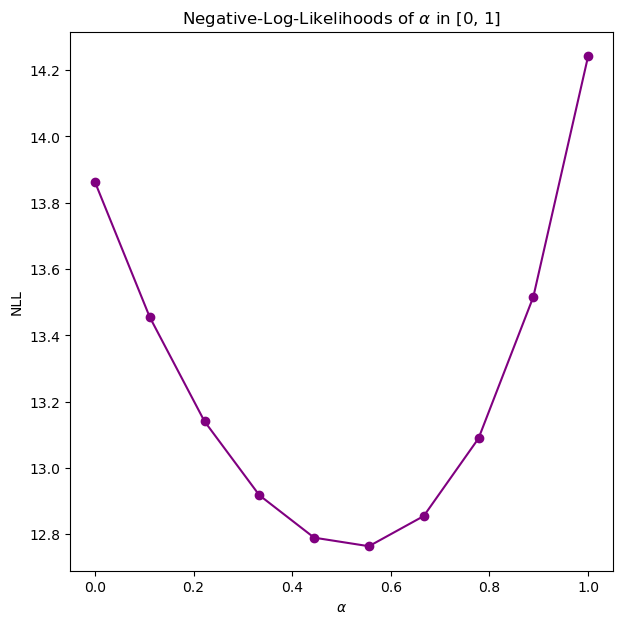

In [3]:
def nll(prob):
    """Calculate the negative log likelihood for a dataset and its predictions.

    Args:
        data (array): The data set.
        prob (array): Predicted probabilities for the data set.

    Returns:
        float: The negative log likelihood.
    """

    return -1 * np.sum(np.log(prob))

def nll_alpha(data, alpha):
    """Calculate the negative log likelihood for exercise 1a.

    Args:
        alpha (float): The alpha parameter.

    Returns:
        float: The negative log likelihood.
    """

    prob_mle = 0.5 * (1 + alpha * data)
    NLL = nll(prob = prob_mle)

    return NLL

alphas = np.linspace(0, 1, 10)
nll_values = [nll_alpha(mle, alpha) for alpha in alphas]

fig, ax = plt.subplots(1, 1, figsize = (7, 7))

ax.plot(alphas, nll_values, marker = "o", color = "purple")
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("NLL")
ax.set_title(r"Negative-Log-Likelihoods of $\alpha$ in [0, 1]")
plt.savefig("1a_NLL_of_alphas.png")

Now, we are able to determine the MLE $\hat{\alpha}$ using our data of the NLL. The lowest NLL is at $\alpha = 0.56$

In [8]:
i = np.argwhere(nll_values == min(nll_values))[0][0]
min_a = alphas[i]
print(min_a)  # load the data set

0.5555555555555556


## Maximumm likelihood and least squares
In the file *exponential_data.txt* there are 1000 decay time measurements between 0 and 5 μs of muons, which have a mean lifetime of τ = 2 μs. It is that we know the PDF used to generate this data, which is:
$$P(t) = \frac{1}{\tau * (1 - e^{-5/\tau})} * e^{-t / \tau$$
where $\tau$ is the mean decay time in $\mu s$ and t is the measured decay time.

In [ ]:
# load the data
ddecay = np.loadtxt("exponential_data.txt")

# define the function
def P_t(x, tau):
    return 1 / (tau * (1 - np.exp(-5 / tau)))\
                  * np.exp(-1 * x / tau)

Similarly to before, we calculate twice the negative-log-likelihood (2·NLL($\tau$)) as a function of the lifetime
$\tau$. We shift the values of the 2·NLL($\tau$) such that the minimum is zero (for convience) and plot it for $1.8 < \tau < 2.2 \mu s$.

Text(0.5, 1.0, 'Negative-Log-Likelihoods of tau in (1.8, 2.2)')

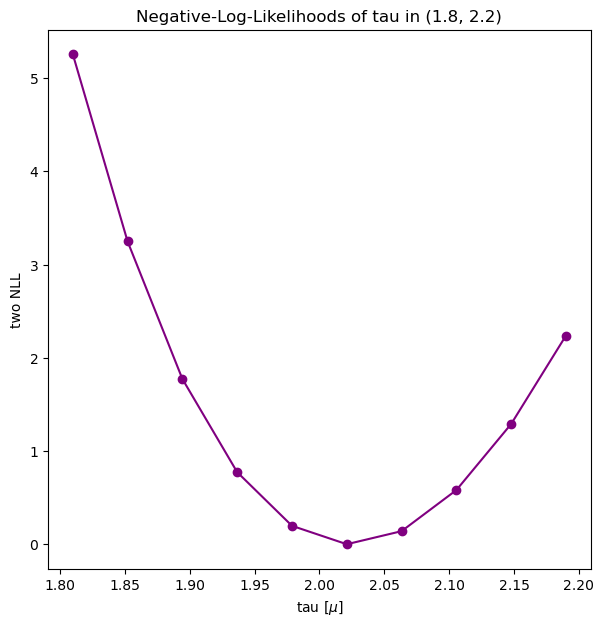

In [14]:
def two_nll(prob):
    """Calculate 2 times the negative log likelihood for a dataset and its probabilites.

    Args:
        data (array): The data set.
        prob (array): Predicted probabilities for the data set.

    Returns:
        float: 2 times the negative log likelihood.
    """
    return 2 * nll(prob)  # lets use existing code


def two_nll_tau(ddecay, tau):
    prob_decay_times = 1 / (tau * (1 - np.exp(-5 / tau))) \
                       * np.exp(-1 * ddecay / tau)

    two_NLL = two_nll(prob=prob_decay_times)

    return two_NLL


taus = np.linspace(1.81, 2.19, 10)
two_nll_values = [two_nll_tau(ddecay, tau) for tau in taus]
two_nll_values -= min(two_nll_values)  # shift of minimum to zero

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.plot(taus, two_nll_values, marker="o", color="purple")
ax.set_xlabel("tau [$\mu$]")
ax.set_ylabel("two NLL")
ax.set_title("Negative-Log-Likelihoods of tau in (1.8, 2.2)")

Next, we bin the time measurements into a histogram of 40 equally sized bins, from 0 to 5 $\mu s$. Use the binned maximum likelihood method to calculate twice the negative-log-likelihood (2·NLL($\tau$)) for these 40 bins as a function of $\tau$. We shift the values of the 2·NLL such that the minimum is zero and overlay the plot with the unbinned calculation in the last code cell. Does it matter if we approximate the integral (by using the mean of the bin) of the function when computing the prediction)

In [ ]:

def binned_2nll(data, tau, nbins, integrate=False):
    """Calculate 2 times the negative log likelihood for a dataset and its probabilites.

    Args:
        data (array): The data set.
        prob (array): Predicted probabilities for the data set.
        nbins (int): Number of bins to use.

    Returns:
        float: 2 times the binned negative log likelihood.
    """

    counts, edges = np.histogram(data, bins=nbins, range = (0, 5))  # get the counts and bin edges. Not sure what they are? Check the documentation!
    # or use the debugger to inspect the variables.
    if integrate:
        pass # scipy intergate
    else:
        bincenter = 0.5 * (edges[1:] + edges[:-1])
        pred = P_2(bincenter, tau)
        bwidth = np.array([edges[i] - edges[i-1] for i in range(len(edges))])
        approx = pred * bwidth[1:]

    return -np.sum(counts * np.log(approx) - approx)

In [15]:
taus = np.linspace(1.81, 2.19, 10)

two_nll_values_bin = [binned_2nll(ddecay, tau, 40) for tau in taus] # implement integrate
two_nll_values_bin -= min(two_nll_values_bin) # shift of minimum to zero

# plot integrate and not integrate

fig, ax = plt.subplots(1, 1, figsize = (7, 7))

ax.plot(taus, two_nll_values_bin, marker = "o", color = "purple")
ax.set_xlabel("tau [müs]")
ax.set_ylabel("NLL")
ax.set_title("Negative-Log-Likelihoods approximated with bincenter")
plt.savefig("2b_two_NLL_of_taus_bins.png")

print(f"\n2B:\n"
      f"The trajectory of the binned function seems to have lower NLL values overall. \n"
      f"Nevertheless, they both display their minimum at the same tau.")

NameError: name 'binned_2nll' is not defined

## Fitting polynomial (With more than one parameter
In the file polynomial *data.dat* wen find 30000 measurements of the variable x between the range -1 and 1.

First we bin these measurements as a histogram with 20 bins and calculate the uncertainty on the number of measurements in each bin using the Poisson distribution.
